<a href="https://colab.research.google.com/github/musanalytics/bigdataanalyticsassessment/blob/main/Exploratory_Data_Analysisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 143 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jre-headless amd64 8u312-b07-0ubuntu1~18.04 [28.2 MB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 openjdk-8-jdk-headless amd64 8u312-b07-0ubuntu1~18.

Next, we will install Apache Spark 3.0.1 with Hadoop 2.7 .

In [2]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-05-19 19:42:33--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  17.8MB/s    in 36s     

2022-05-19 19:43:10 (7.23 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



Now, we just need to unzip that folder.

In [3]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz


There is one last thing that we need to install and that is the findspark library. It will locate Spark on the system and import it as a regular library.

In [4]:
!pip install -q findspark

Now that we have installed all the necessary dependencies in Colab, it is time to set the environment path. This will enable us to run Pyspark in the Colab environment.

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


We need to locate Spark in the system. For that, we import findspark and use the findspark.init() method.

In [6]:
import findspark
findspark.init()
findspark.find()

'/content/spark-3.2.1-bin-hadoop2.7'

Now, we can import SparkSession from pyspark.sql and create a SparkSession, which is the entry point to Spark.

You can give a name to the session using appName() and add some configurations with config() if you wish.

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("ASSESSMENTEDA")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

Finally, print the SparkSession variable.

In [8]:
spark

In [9]:
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

We will use the read.csv module. The inferSchema parameter provided will enable Spark to automatically determine the data type for each column but it has to go over the data once. If you don’t want that to happen, then you can instead provide the schema explicitly in the schema parameter.

In [10]:
dfm = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)


In [11]:
dfm.printSchema()

root
 |-- userId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- teamLevel: integer (nullable = true)
 |-- platformType: string (nullable = true)
 |-- count_gameclicks: integer (nullable = true)
 |-- count_hits: integer (nullable = true)
 |-- count_buyId: string (nullable = true)
 |-- avg_price: string (nullable = true)



In [12]:
import matplotlib.pyplot as plt

import seaborn as sns

import sklearn

import random

import os


In [13]:

from pyspark.sql.functions import col,isnan, when, count

dfm.na.drop().count()

dfm.na.drop(how="any", thresh=2).show()
from pyspark.ml.feature import Imputer

imputer = Imputer(
    inputCols=['count_buyId', 'avg_price'], 
    outputCols=["{}_imputed".format(c) for c in ['count_buyId', 'avg_price']]
    ).setStrategy("mean")

#Add imputation cols to customer_df
customer_df2 = imputer.fit(dfm.transform(dfm)

customer_df2.show()

customer_df2.printSchema()

SyntaxError: ignored

In [14]:
dfad = spark.read.csv("/content/ad-clicks.csv", header=True, inferSchema=True)
dfbuy = spark.read.csv("/content/buy-clicks.csv", header=True, inferSchema=True)
dfgame = spark.read.csv("/content/game-clicks.csv", header=True, inferSchema=True)
df_level= spark.read.csv("/content/level-events.csv", header=True, inferSchema=True)
df_team_assignment = spark.read.csv("/content/team-assignments.csv", header=True, inferSchema=True)
df_team = spark.read.csv("/content/team.csv", header=True, inferSchema=True)
df_user_session = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)
df_user = spark.read.csv("/content/users.csv", header=True, inferSchema=True)

In [14]:
dfad = dfad.groupBy('adCategory').count().toPandas()

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


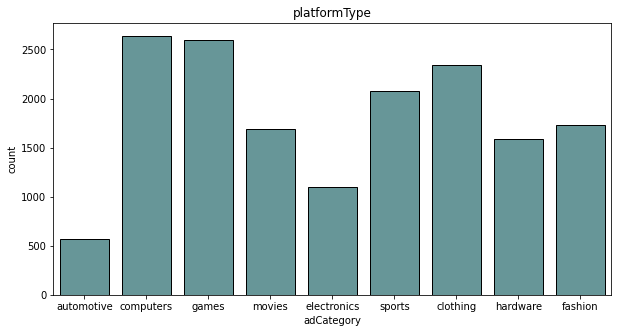

In [15]:
display(pd)
plt.figure(figsize=(10,5))
plt.title('platformType')
sns.barplot(dfad['adCategory'],dfad['count'], color = 'cadetblue', edgecolor = 'black');

In [17]:
df_level = df_level.groupBy('teamLevel').count().toPandas()

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


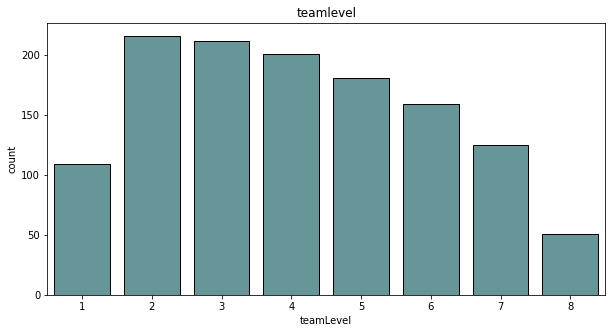

In [18]:
display(pd)
plt.figure(figsize=(10,5))
plt.title('teamlevel')
sns.barplot(df_level['teamLevel'],df_level['count'], color = 'cadetblue', edgecolor = 'black');

In [ ]:
labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
plt.show()

In [ ]:
df4 = df_level.toPandas()
team_level = df4.groupby("teamLevel").agg({'teamId': "sum"})
team_level.plot.bar(title="Bar Chart of Team Levels")

In [19]:
df_userd =df_user_session.groupBy('platformType').count().toPandas()
            
          

In [20]:
df_userd

,platformType,count
0,iphone,3874
1,android,3274
2,linux,504
3,mac,358
4,windows,1240


<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


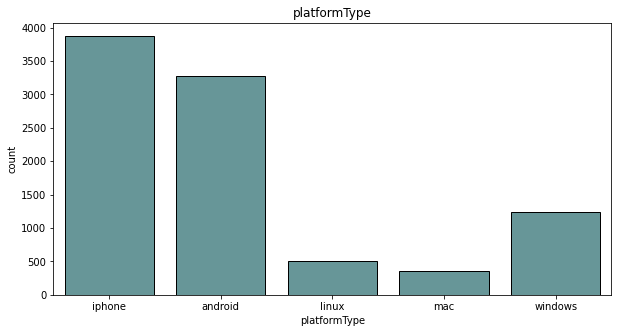

In [26]:
display(pd)
plt.figure(figsize=(10,5))
plt.title('platformType')
sns.barplot(df_userd['platformType'],df_userd['count'], color = 'cadetblue', edgecolor = 'black');

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

NameError: ignored

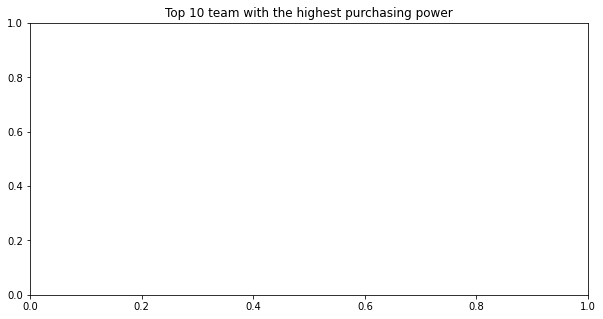

In [27]:
display(pd)
plt.figure(figsize=(10,5))
plt.title('Top 10 team with the highest purchasing power')
sns.barplot(dfsort['team'],dfsort['sum_price']);

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random
import os

In [29]:
df_user.printSchema()
df_user.limit(3).toPandas()

root
 |-- timestamp: string (nullable = true)
 |-- userId: integer (nullable = true)
 |-- nick: string (nullable = true)
 |-- twitter: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- country: string (nullable = true)



,timestamp,userId,nick,twitter,dob,country
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS


In [30]:
df_age = df_user.select(df_user["dob"]).show()


+----------+
|       dob|
+----------+
|1994-07-20|
|1971-04-22|
|1970-04-19|
|1965-11-23|
|1994-08-23|
|1986-09-11|
|1991-11-28|
|1977-07-03|
|1951-09-25|
|1979-11-12|
|1996-08-27|
|1980-10-18|
|1957-02-17|
|1977-03-02|
|1979-10-05|
|1981-10-23|
|1989-06-20|
|1949-08-12|
|1983-12-04|
|1980-05-03|
+----------+
only showing top 20 rows



In [34]:
## floor or round down in pyspark
 
from pyspark.sql.functions import floor, col
from pyspark.sql.functions import current_date
from pyspark.sql.functions import to_date
from pyspark.sql.functions import when
from pyspark.sql import functions as F

from pyspark.sql import functions as F

df = df_age.withColumn('age', (F.months_between(current_date(), F.col('dob')) / 12).cast('int'))

AttributeError: ignored

In [35]:
from pyspark.sql.functions import lit
df_age.withColumn("age", lit(0.3)) \
  .show()

AttributeError: ignored

In [36]:
dfbuy.printSchema()
dfbuy.limit(3).toPandas()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



,timestamp,txId,userSessionId,team,userId,buyId,price
0,2016-05-26 15:36:54,6004,5820,9,1300,2,3.0
1,2016-05-26 15:36:54,6005,5775,35,868,4,10.0
2,2016-05-26 15:36:54,6006,5679,97,819,5,20.0


In [37]:
ranked_dfbuy = dfbuy
ranked_dfbuy.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



In [ ]:
from pyspark.sql.functions import sum, col, desc
df = ranked_dfbuy.groupBy("team") \
  .agg(sum("price").alias("sum_price")) \
  .filter(col("sum_price") > 0)  \
  .sort(desc("sum_price")) \
  .show(10) 
  


+----+---------+
|team|sum_price|
+----+---------+
|  27|    880.0|
|  54|    777.0|
|  35|    710.0|
|  64|    693.0|
|  53|    677.0|
|  66|    647.0|
|  59|    644.0|
|  11|    587.0|
|  97|    549.0|
|  22|    535.0|
+----+---------+
only showing top 10 rows



In [ ]:
ranked_dfbuy.groupBy("team").sum("price").show()

+----+----------+
|team|sum(price)|
+----+----------+
| 148|      53.0|
|  85|     352.0|
| 137|      69.0|
|  53|     677.0|
| 133|     203.0|
|  78|     176.0|
| 108|     169.0|
| 155|      70.0|
| 115|     143.0|
| 126|     103.0|
|  28|       8.0|
|  27|     880.0|
|  44|     188.0|
| 103|     140.0|
|  22|     535.0|
| 128|      47.0|
| 122|      50.0|
|  93|     260.0|
| 157|      48.0|
| 111|     412.0|
+----+----------+
only showing top 20 rows



In [ ]:
dfGroup=ranked_dfbuy.groupBy("team") \
          .agg(sum("price").alias("sum_price"))
dfSort = dfGroup.sort(desc("sum_price"))

In [33]:
dfsort = dfSort.limit(10).toPandas()

NameError: ignored

In [ ]:
dfsort

,team,sum_price
0,27,880.0
1,54,777.0
2,35,710.0
3,64,693.0
4,53,677.0
5,66,647.0
6,59,644.0
7,11,587.0
8,97,549.0
9,22,535.0


In [24]:
pandas_dfbuy = dfbuy.toPandas()


NameError: ignored

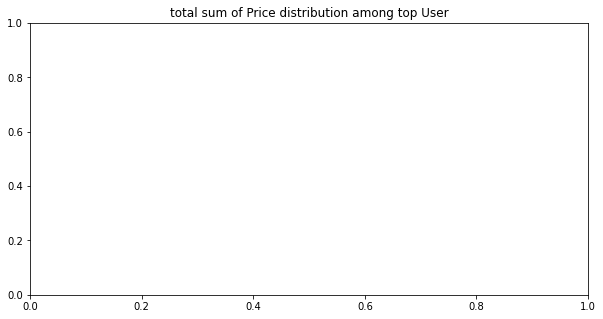

In [25]:
plt.figure(figsize=(10,5))
plt.title('total sum of Price distribution among top User')
#sns.distplot(dfsort['sum_price']);
sns.distplot(dfsort['sum_price'], color = 'red');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


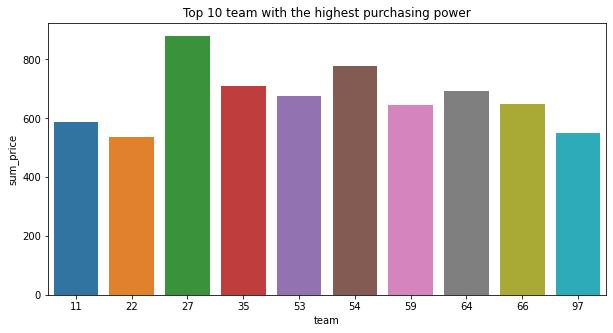

In [ ]:
display(pd)
plt.figure(figsize=(10,5))
plt.title('Top 10 team with the highest purchasing power')
sns.barplot(dfsort['team'],dfsort['sum_price']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


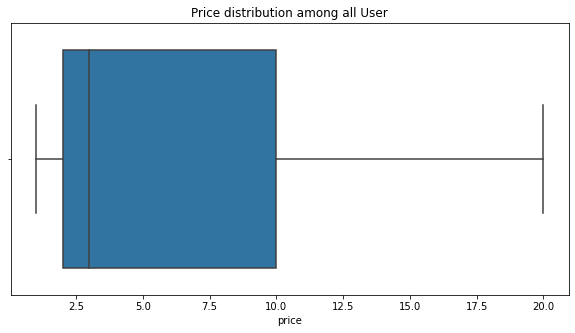

In [28]:
pandas_dfbuy = dfbuy.toPandas()

plt.figure(figsize=(10,5))
plt.title('Price distribution among all User')
#sns.distplot(pandas_dfbuy['price']);
sns.boxplot(pandas_dfbuy['price']);

In [ ]:
pandas_dfbuyp = dfbuy.groupBy('price').count().toPandas()


<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


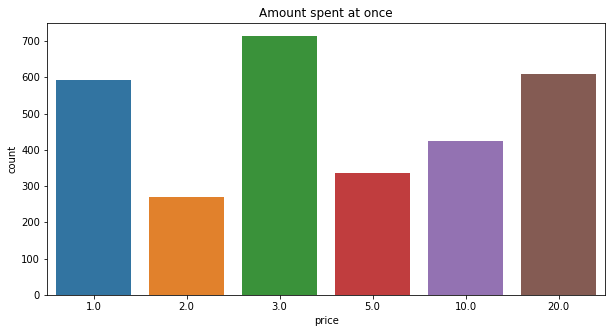

In [ ]:
display(pd)
plt.figure(figsize=(10,5))
plt.title('Amount spent at once')
sns.barplot(pandas_dfbuyp['price'],pandas_dfbuyp['count']);

<module 'pandas' from '/usr/local/lib/python3.7/dist-packages/pandas/__init__.py'>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


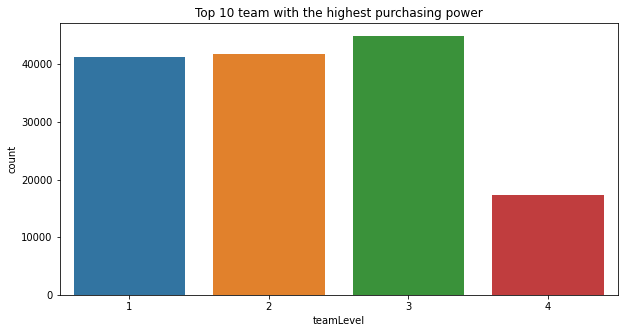

In [29]:
df_game = dfgame.groupBy('teamLevel').count().toPandas()
display(pd)
plt.figure(figsize=(10,5))
plt.title('Top teams with the highest purchasing power')
sns.barplot(df_game['teamLevel'],df_game['count']);



In [ ]:
df_game

,teamLevel,count
0,1,67271
1,6,122757
2,3,98823
3,5,117099
4,4,111176
5,8,51294
6,7,106436
7,2,80950


In [26]:
user_session_df = spark.read.csv("/content/user-session.csv", header=True, inferSchema=True)

platform_usage_stats_df = user_session_df.groupBy("platformType").agg(f.mean("teamLevel").alias("average_rank"), 

                                            f.count("platformType").alias("total_platform_count")).orderBy("average_rank")




xlabels = list(platform_usage_stats_df.toPandas()["platformType"])

# platform_usage_stats_df.toPandas().plot.bar()



labels = list(platform_usage_stats_df.toPandas()["platformType"])

sizes =  list(platform_usage_stats_df.toPandas()["total_platform_count"])




colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red', "brown"]

# explode = tuple( if X == 0 else x=0 for x in range(len(labels)) ) 



max = 0

for i in sizes:

  if max< i:

    max = i

  



explode = list(0 for _ in sizes)



explode[sizes.index(max)]  = 0.1



# 0, 0.1, 0, 0,0,0

# Plot

plt.figure(figsize=(10,8))

plt.pie(sizes,explode = explode, labels=labels, colors=colors,

        autopct='%1.1f%%', shadow=True, startangle=140)




# Create a circle for the center of the plot

my_circle=plt.Circle( (0,0), 0.7, color="white")

p=plt.gcf()

p.gca().add_artist(my_circle)



plt.axis('equal')






plt.show()

NameError: ignored